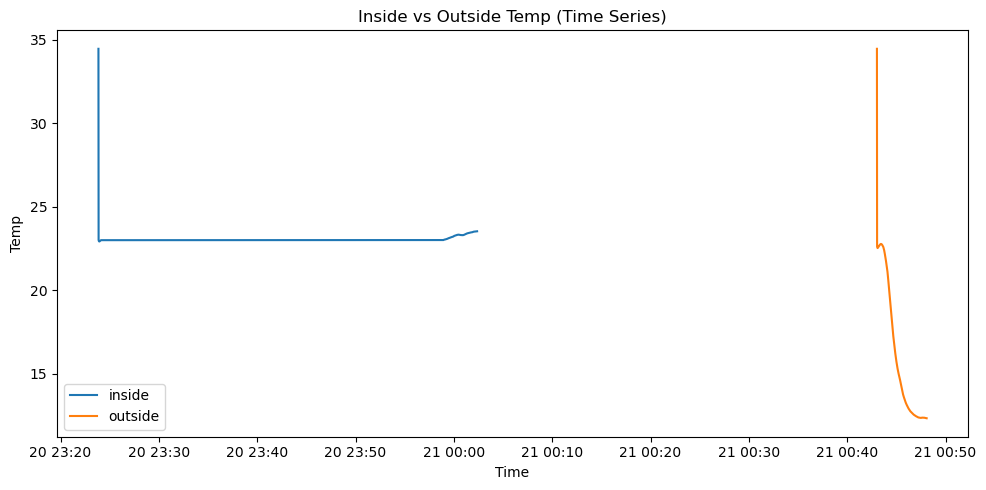

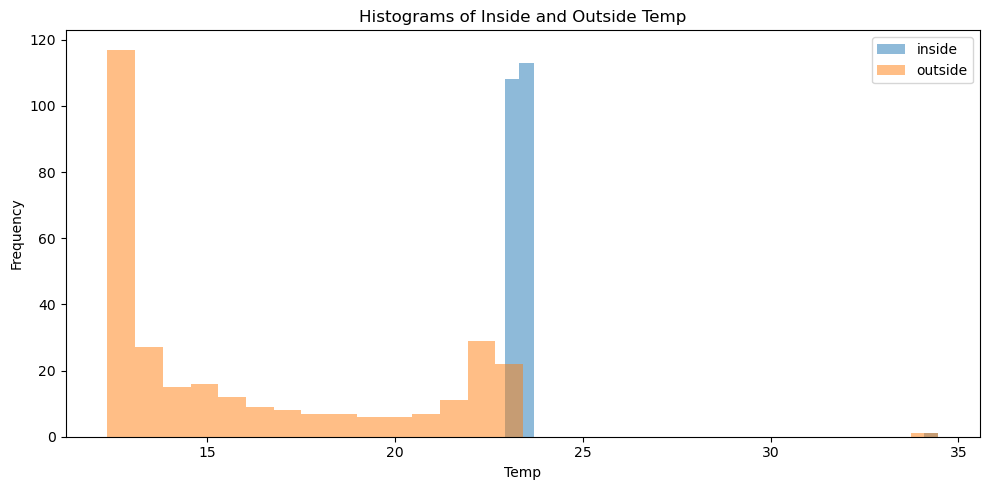


--- Temp ---
N inside = 222, N outside = 300
Mean inside  = 23.3307
Mean outside = 16.0338
Sigma (intrinsic) inside  = 0.769753
Sigma (intrinsic) outside = 4.08119
Sigma_mean inside  = 0.0516625
Sigma_mean outside = 0.235627
|Δmean| = 7.29681
Combined sigma_mean (for Δ) = 0.241225
Statistically different at > 3σ (means separated by more than 3σ of uncertainty on the mean)


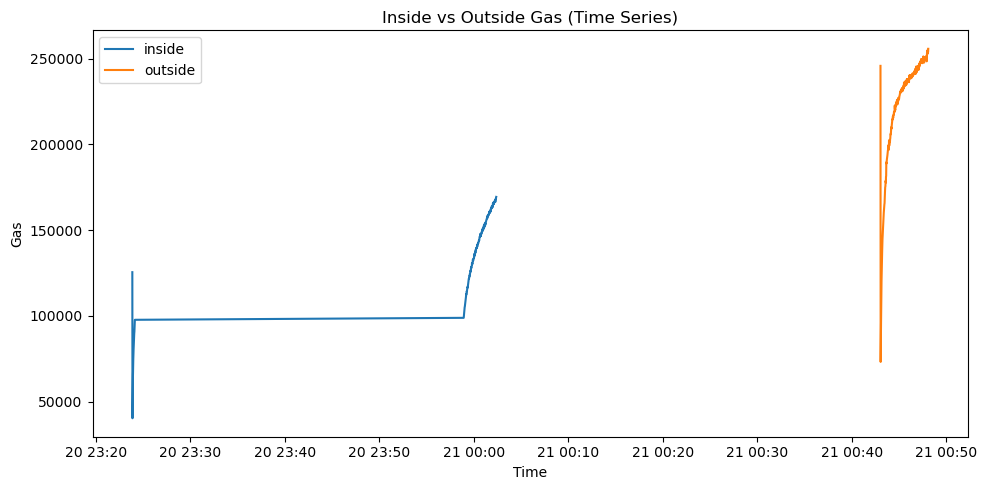

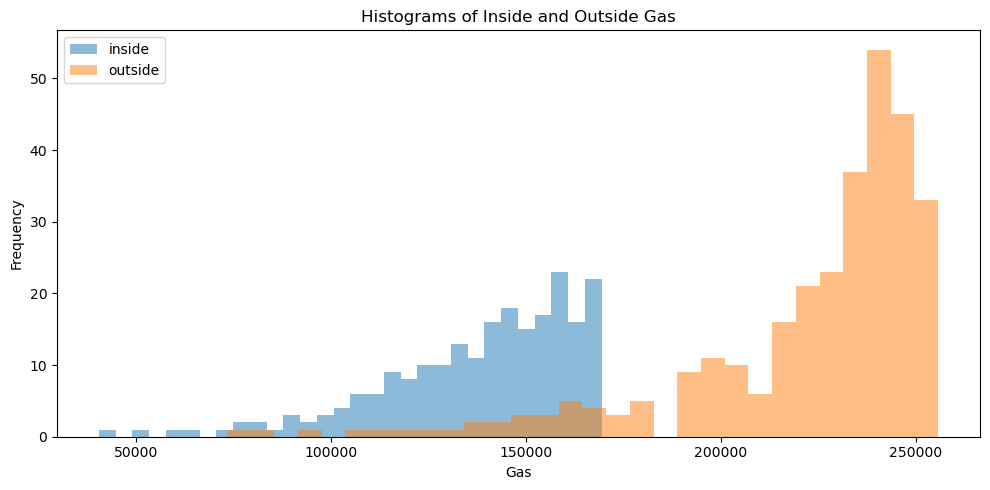


--- Gas ---
N inside = 222, N outside = 300
Mean inside  = 137922
Mean outside = 222925
Sigma (intrinsic) inside  = 24855.3
Sigma (intrinsic) outside = 32293.8
Sigma_mean inside  = 1668.18
Sigma_mean outside = 1864.49
|Δmean| = 85003.2
Combined sigma_mean (for Δ) = 2501.83
Statistically different at > 3σ (means separated by more than 3σ of uncertainty on the mean)


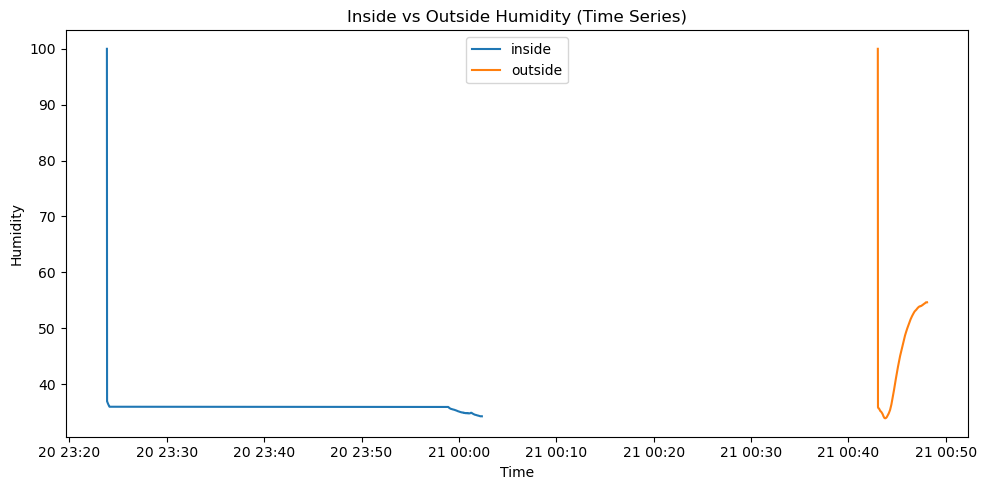

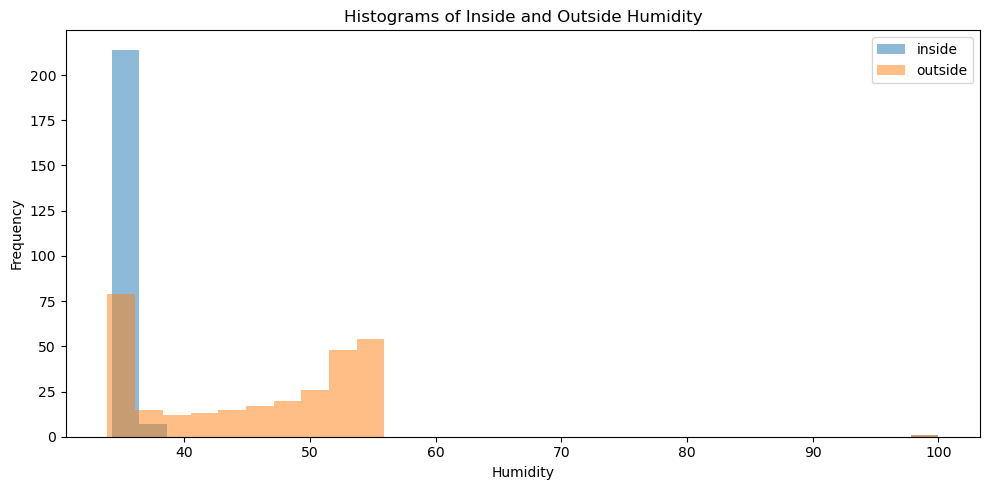


--- Humidity ---
N inside = 222, N outside = 300
Mean inside  = 35.3298
Mean outside = 45.3265
Sigma (intrinsic) inside  = 4.39615
Sigma (intrinsic) outside = 8.45044
Sigma_mean inside  = 0.29505
Sigma_mean outside = 0.487886
|Δmean| = 9.99671
Combined sigma_mean (for Δ) = 0.570165
Statistically different at > 3σ (means separated by more than 3σ of uncertainty on the mean)


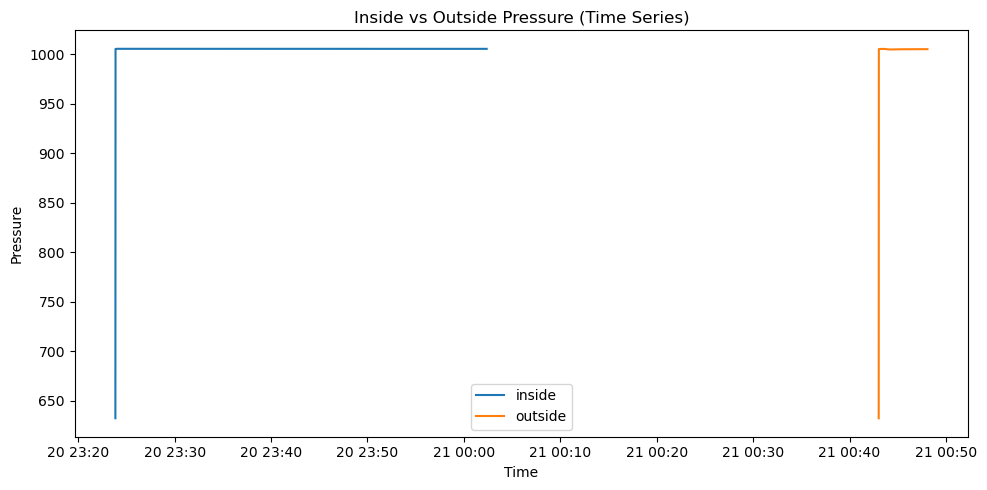

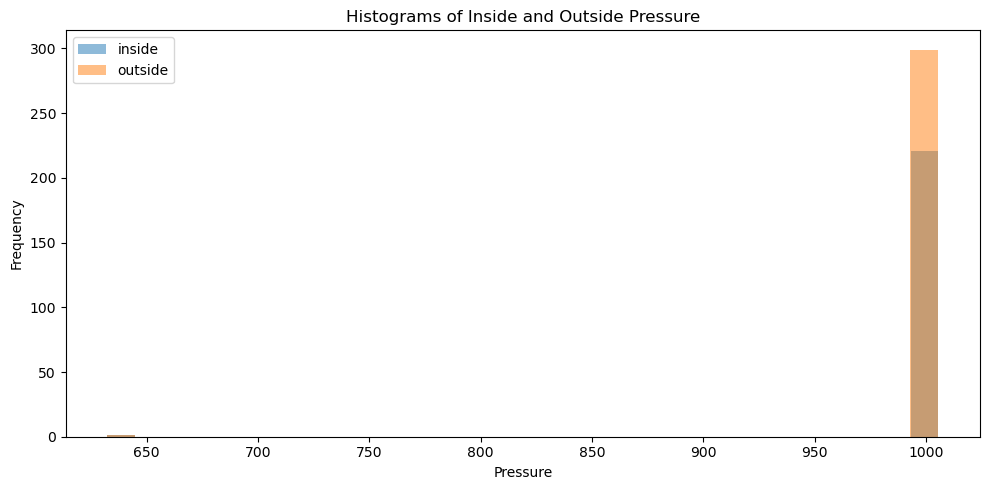


--- Pressure ---
N inside = 222, N outside = 300
Mean inside  = 1003.87
Mean outside = 1003.92
Sigma (intrinsic) inside  = 25.0489
Sigma (intrinsic) outside = 21.5259
Sigma_mean inside  = 1.68117
Sigma_mean outside = 1.2428
|Δmean| = 0.0488449
Combined sigma_mean (for Δ) = 2.09066
Not statistically different at > 3σ


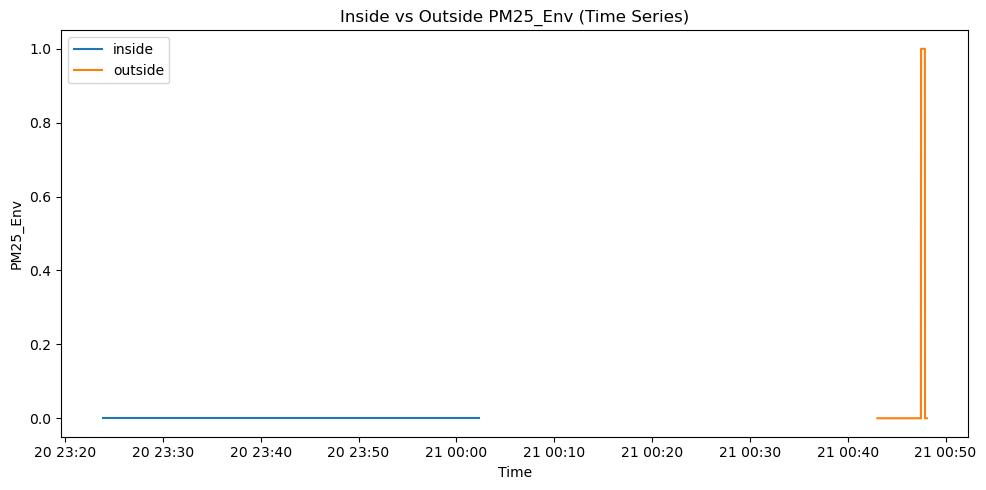

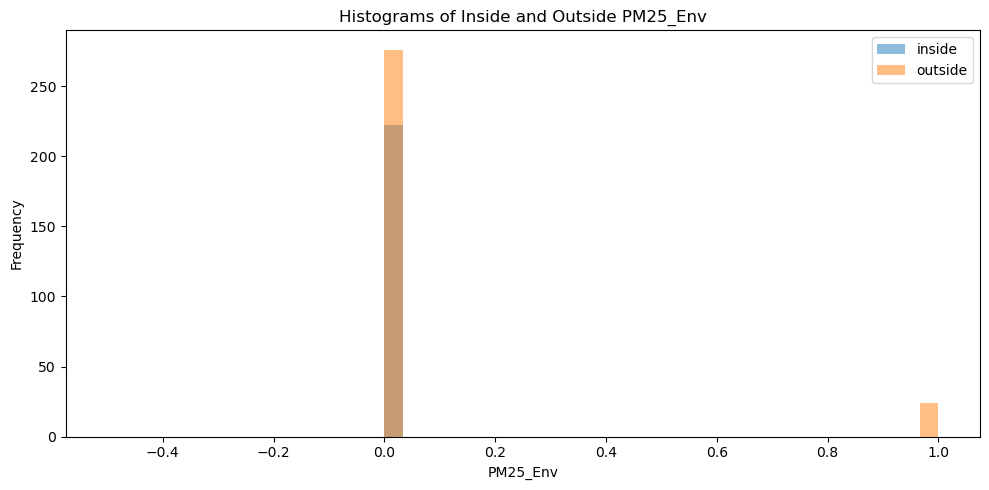


--- PM25_Env ---
N inside = 222, N outside = 300
Mean inside  = 0
Mean outside = 0.08
Sigma (intrinsic) inside  = 0
Sigma (intrinsic) outside = 0.271746
Sigma_mean inside  = 0
Sigma_mean outside = 0.0156893
|Δmean| = 0.08
Combined sigma_mean (for Δ) = 0.0156893
Statistically different at > 3σ (means separated by more than 3σ of uncertainty on the mean)


,variable,n_in,n_out,mean_in,mean_out,sigma_in,sigma_out,sigma_mean_in,sigma_mean_out,diff,sigma_diff,different_3sigma
0,Temp,222,300,23.330655,16.033842,0.769753,4.081188,0.051662,0.235627,7.296813,0.241225,True
1,Gas,222,300,137921.927928,222925.103333,24855.318824,32293.836621,1668.179773,1864.485527,85003.175405,2501.825341,True
2,Humidity,222,300,35.329761,45.326476,4.396146,8.450439,0.295050,0.487886,9.996714,0.570165,True
3,Pressure,222,300,1003.867669,1003.916514,25.048885,21.525872,1.681171,1.242797,0.048845,2.090665,False
4,PM25_Env,222,300,0.000000,0.080000,0.000000,0.271746,0.000000,0.015689,0.080000,0.015689,True


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

indoor  = pd.read_csv("indoor.csv")
outdoor = pd.read_csv("rundata.csv")

timestamp_col = "Timestamp"
variables = [c for c in indoor.columns if c != timestamp_col]

indoor["Time"]  = pd.to_datetime(indoor[timestamp_col], unit="s", errors="coerce")
outdoor["Time"] = pd.to_datetime(outdoor[timestamp_col], unit="s", errors="coerce")

indoor  = indoor.dropna(subset=["Time"])
outdoor = outdoor.dropna(subset=["Time"])

for v in variables:
    indoor[v] = pd.to_numeric(indoor[v], errors="coerce")
    outdoor[v] = pd.to_numeric(outdoor[v], errors="coerce")

def stats_and_test(x_in, x_out):
    x_in  = np.asarray(x_in, dtype=float)
    x_out = np.asarray(x_out, dtype=float)

    # remove NaNs
    x_in  = x_in[np.isfinite(x_in)]
    x_out = x_out[np.isfinite(x_out)]

    n_in, n_out = len(x_in), len(x_out)

    mean_in  = np.mean(x_in)
    mean_out = np.mean(x_out)

    sigma_in  = np.std(x_in, ddof=1) if n_in  > 1 else np.nan
    sigma_out = np.std(x_out, ddof=1) if n_out > 1 else np.nan

    sigma_mean_in  = sigma_in  / np.sqrt(n_in)  if n_in  > 1 else np.nan
    sigma_mean_out = sigma_out / np.sqrt(n_out) if n_out > 1 else np.nan

    sigma_diff = np.sqrt(sigma_mean_in**2 + sigma_mean_out**2)

    diff = abs(mean_in - mean_out)
    statistically_different = diff > 3.0 * sigma_diff

    return {
        "n_in": n_in, "n_out": n_out,
        "mean_in": mean_in, "mean_out": mean_out,
        "sigma_in": sigma_in, "sigma_out": sigma_out,
        "sigma_mean_in": sigma_mean_in, "sigma_mean_out": sigma_mean_out,
        "diff": diff, "sigma_diff": sigma_diff,
        "different_3sigma": statistically_different
    }

results = []

for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(indoor["Time"], indoor[var], label="inside")
    plt.plot(outdoor["Time"], outdoor[var], label="outside")
    plt.title(f"Inside vs Outside {var} (Time Series)")
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))

    in_data = indoor[var].dropna().values
    out_data = outdoor[var].dropna().values

    combined = np.concatenate([in_data, out_data]) if (len(in_data) and len(out_data)) else (in_data if len(in_data) else out_data)
    if len(combined) > 0:
        bins = 30
        plt.hist(in_data, bins=bins, alpha=0.5, label="inside")
        plt.hist(out_data, bins=bins, alpha=0.5, label="outside")

    plt.title(f"Histograms of Inside and Outside {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

    s = stats_and_test(indoor[var], outdoor[var])
    s["variable"] = var
    results.append(s)

    print(f"\n--- {var} ---")
    print(f"N inside = {s['n_in']}, N outside = {s['n_out']}")
    print(f"Mean inside  = {s['mean_in']:.6g}")
    print(f"Mean outside = {s['mean_out']:.6g}")
    print(f"Sigma (intrinsic) inside  = {s['sigma_in']:.6g}")
    print(f"Sigma (intrinsic) outside = {s['sigma_out']:.6g}")
    print(f"Sigma_mean inside  = {s['sigma_mean_in']:.6g}")
    print(f"Sigma_mean outside = {s['sigma_mean_out']:.6g}")
    print(f"|Δmean| = {s['diff']:.6g}")
    print(f"Combined sigma_mean (for Δ) = {s['sigma_diff']:.6g}")
    if s["different_3sigma"]:
        print("Statistically different at > 3σ (means separated by more than 3σ of uncertainty on the mean)")
    else:
        print("Not statistically different at > 3σ")

summary = pd.DataFrame(results)[[
    "variable", "n_in", "n_out",
    "mean_in", "mean_out",
    "sigma_in", "sigma_out",
    "sigma_mean_in", "sigma_mean_out",
    "diff", "sigma_diff", "different_3sigma"
]]
display(summary)

- Temperature: The outdoor temperature was measured to be much more distributed than the indoor temperature with a lower mean. The two data sets were found to be statistically different.
- Gas: The distribution of the gas data recorded by the weather sensor is seen to be of similar shape between indoor and outdoor measurements, but with higher values at higher frequencies outdoors. Again, the two data sets were found to be statistically different.
- Humidity: Again the outdoor humidity distribution is seen to be more distributed with higher measurements recorded on average. The two data sets are also statiscally different.
- Pressure: As expected, the pressure distributions of both inside and outside measurements are identical (except the number of counts as outdoor measurements ran slightly longer). The two data sets are not statiscally different.
- Air Quality: There was an issue either with the code recording the air quality measurements or with the air quality sensor itself, so the PM25_Env data records zero for all measurements, and the data could not be plotted or analyzed.

- Note that the primary reason why the outdoor data tends to be much more distributed than the indoor data is that the outdoor measurements were initiated indoors while the raspberry pi was still connected to the monitor, so a fraction of the outdoor data are in fact indoor measurements.